In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-whitegrid')

import numpy as np
from numpy import genfromtxt
import pandas as pd
from collections import Counter

In [2]:
packets = pd.read_csv('./timing.csv', delimiter=';', header=0)
# , nrows=1000000

In [17]:
censored_qname = set(packets[(packets.is_response == 1)].qname.to_list())

In [23]:
ipid0_ts = []
ipidn0_ts = []

for q in censored_qname:
    p = packets[packets.qname == q]
    if len(p) >= 3:
        sent_ts = float(p[p.is_response == 0].ts)
        ipid0 = p[(p.is_response == 1) & (p.ipid == '0x00000000')].ts.tolist()
        if len(ipid0) != 1:
            continue
        ipid0_ts.append(ipid0[0] - sent_ts)
        
        ipidn0 = p[(p.is_response == 1) & (p.ipid != '0x00000000')].ts.tolist()
        ipidn0_ts.append(ipidn0[0] - sent_ts)

In [24]:
with open('ipid0.txt', 'w') as f:
    for t in ipid0:
        f.write('%s\n' % t)

In [25]:
with open('ipidn0.txt', 'w') as f:
    for t in ipidn0:
        f.write('%s\n' % t)

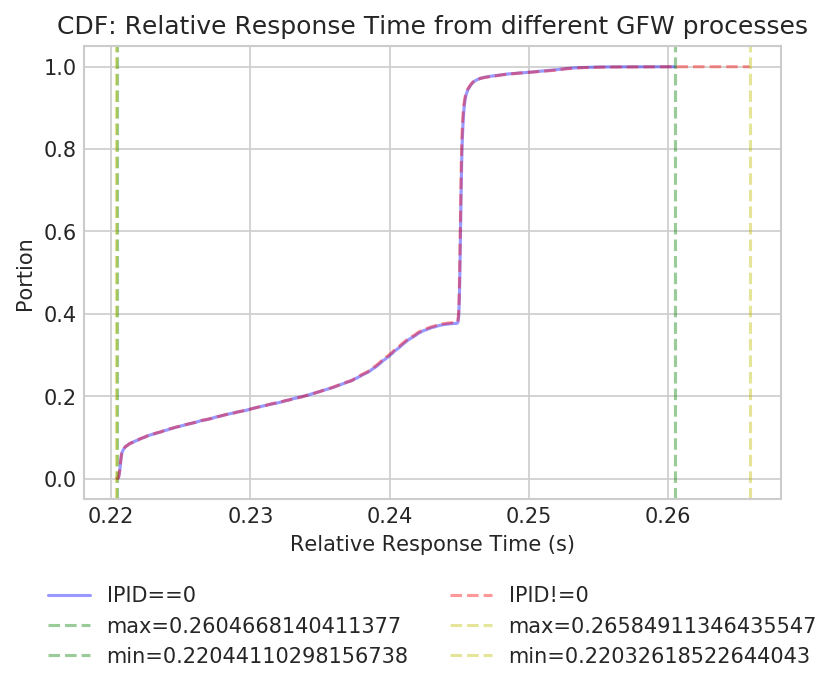

In [39]:
plt.rcParams['figure.dpi'] = 150


fig = plt.figure()
ax = plt.axes()

## IPID0

sorted_data = np.sort(ipid0_ts)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="IPID==0", color='b', alpha=0.4)

ax.axvline(x=max(sorted_data), 
           color='g', 
           label="max={}".format(max(sorted_data)),
           ls='--',
           alpha=0.4)
ax.axvline(x=min(sorted_data),
           color='g',
           label="min={}".format(min(sorted_data)),
           ls='--',
           alpha=0.4)

## IPID!0

sorted_data = np.sort(ipidn0_ts)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="IPID!=0", color='r', ls='--', alpha=0.4)

ax.axvline(x=max(sorted_data), 
           color='y', 
           label="max={}".format(max(sorted_data)),
           ls='--',
           alpha=0.4)
ax.axvline(x=min(sorted_data),
           color='y',
           label="min={}".format(min(sorted_data)),
           ls='--',
           alpha=0.4)

ax.set(xlabel='Relative Response Time (s)', ylabel='Portion')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, fancybox=True, shadow=True)
plt.title('CDF: Relative Response Time from different GFW processes');

In [56]:
counter = 0
delta_ipid0_subtracted_by_ipidn0 = []
for compare in zip(ipid0_ts, ipidn0_ts):
    a, b = compare
    delta_ipid0_subtracted_by_ipidn0.append((a - b) * 1000)
    if a > b:
        counter += 1

print("In {} out {} DNS queries, which is {}%, IPID=0 response came first,".format(counter , len(ipid0_ts), counter / len(ipid0_ts) * 100))

In 14562 out 19737 DNS queries, which is 73.78020975832193%, IPID=0 response came first,


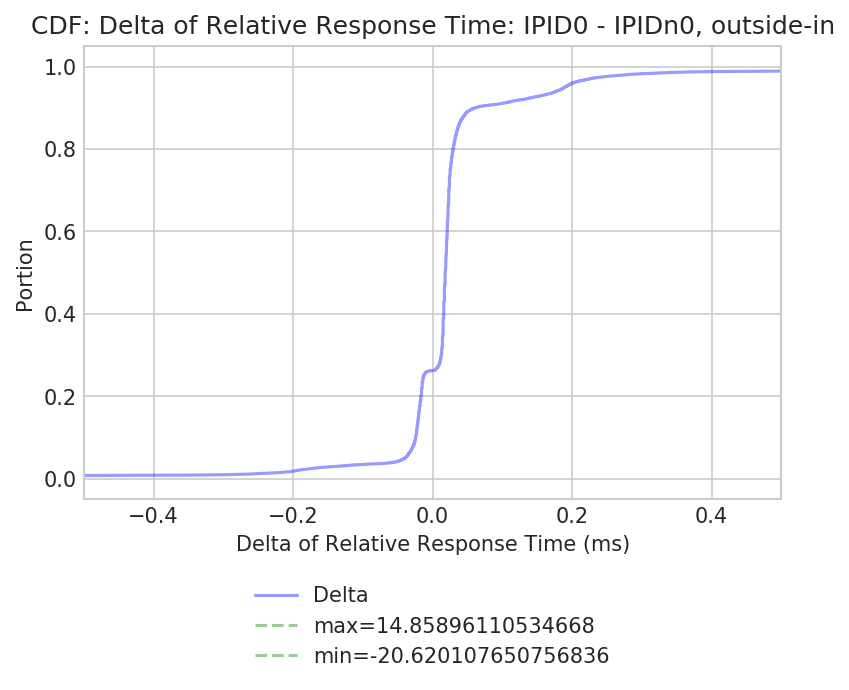

In [62]:
plt.rcParams['figure.dpi'] = 150


fig = plt.figure()
ax = plt.axes()

## IPID0

sorted_data = np.sort(delta_ipid0_subtracted_by_ipidn0)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="Delta", color='b', alpha=0.4)

ax.axvline(x=max(sorted_data), 
           color='g', 
           label="max={}".format(max(sorted_data)),
           ls='--',
           alpha=0.4)
ax.axvline(x=min(sorted_data),
           color='g',
           label="min={}".format(min(sorted_data)),
           ls='--',
           alpha=0.4)

ax.set(xlabel='Delta of Relative Response Time (ms)', ylabel='Portion')
#ax.set_xscale('symlog')
ax.set_xlim(-0.5, 0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=1, fancybox=True, shadow=True)

plt.title('CDF: Delta of Relative Response Time: IPID0 - IPIDn0, outside-in');